In [1]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

from neuralnet import NeuralNet
from data_processing import DataProcess

torch.set_printoptions(profile='full')
# torch.manual_seed(0)
# random.seed(0)

In [2]:
dp = DataProcess()
train_data, train_labels, test_data, test_labels = dp.get_separated_data()

learning_rate = 1e-4
batch_size = 64
epochs = 100
threshold = 0.5
zero_weight = 0.1

model = NeuralNet(hidden_dims=[60, 24])

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.BCELoss()

/Users/workingaccount/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/workingaccount/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [3]:
def test(model, x, y):
    model.eval()
    loss, acc = 0, 0
    
    y_ = model.forward(x)
    # loss = model.loss(y_, y, zero_weight).item()
    loss = criterion(y_, y).item()
    pred = y_ > threshold
    acc = 100. * pred.eq(y).sum().item()
    
    return loss / y.size(dim=0), acc / y.size(dim=0)

100%|██████████| 100/100 [00:09<00:00, 10.71it/s]


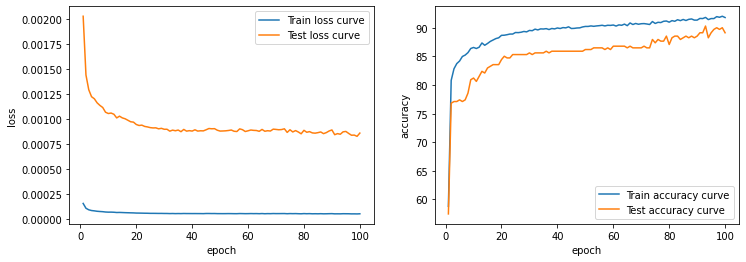

Training accuracy: 91.81141439205955 Test accuracy: 89.14956011730206


In [4]:
history = {'epoch': [], 
           'train_loss': [], 'train_acc': [],
           'test_loss': [], 'test_acc': []
          }

for epoch in tqdm(range(1, epochs + 1)):
    it = 0
    while it < len(train_data):
        ite = min(it + batch_size, len(train_data))
        idx = np.arange(it, ite)
        x, y = torch.Tensor(train_data[idx, :]), torch.Tensor(train_labels[idx, np.newaxis])
        it = ite

        y_ = model(x)
        loss = model.loss(y_, y, zero_weight)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    history['epoch'].append(epoch)

    train_loss, train_acc = test(model, torch.Tensor(train_data), torch.Tensor(train_labels[:, np.newaxis]))
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)

    test_loss, test_acc = test(model, torch.Tensor(test_data), torch.Tensor(test_labels[:, np.newaxis]))
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(range(1, epochs+1), history['train_loss'])
axes[0].plot(range(1, epochs+1), history['test_loss'])
axes[0].legend(['Train loss curve', 'Test loss curve'])
axes[0].set_xlabel('epoch')
axes[0].set_ylabel('loss')


axes[1].plot(range(1, epochs+1), history['train_acc'])
axes[1].plot(range(1, epochs+1), history['test_acc'])
axes[1].legend(['Train accuracy curve', 'Test accuracy curve'])
axes[1].set_xlabel('epoch')
axes[1].set_ylabel('accuracy')
plt.show()

print(f"Training accuracy: {history['train_acc'][-1]}", f"Test accuracy: {history['test_acc'][-1]}")

In [5]:
test_loss, test_acc = test(model, torch.Tensor(test_data), torch.Tensor(test_labels[:, np.newaxis]))

In [9]:
for i in range(1, 10):
    threshold = i/10
    test_loss, test_acc = test(model, torch.Tensor(test_data), torch.Tensor(test_labels[:, np.newaxis]))
    print(threshold, test_acc)

0.1 77.41935483870968
0.2 81.52492668621701
0.3 83.87096774193549
0.4 87.09677419354838
0.5 89.14956011730206
0.6 91.49560117302053
0.7 92.96187683284458
0.8 93.54838709677419
0.9 95.01466275659824
